In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import h5py
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# 데이터 불러오기 함수
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [8]:
import os
os.getcwd()
os.chdir(r"C:\Users\User\e_commerce\exam")

In [9]:
# 데이터 불러오기
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


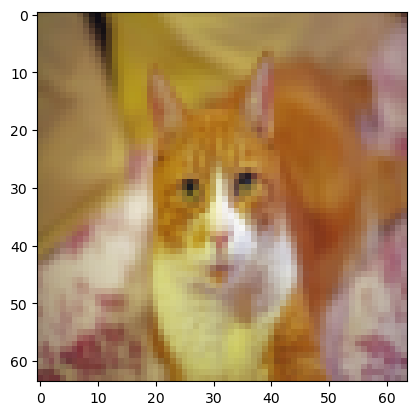

In [10]:
# 이미지 예제
index = 24
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) +\
      ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

# 문제1 : 데이터셋의 크기 정의

In [11]:
# 문제1. m_train, m_test 및 num_px를 각각 정의하시오.
# m_train = ..
# m_test = ..
# num_px = ..
# 아래 약 3줄의 코드를 완성하세요.
m_train =
m_test =
num_px =
# 여기까지 작성하세요.

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))

SyntaxError: invalid syntax (1276385577.py, line 6)

### 문제2 설명
training 및 test 데이터셋 행렬의 데이터 하나하나를 각각 1행의 데이터로 만들어줍니다.
기존의 데이터 사이즈가 (num_px, num_px, 3)이었다면, flatten 적용 후에는
1행의 벡터(num\_px $*$ num\_px $*$ 3, 1)가 됩니다.

**참고** : 2차원 이상의 행렬 하나를 벡터로 변환하는 파이썬 코드는 아래와 같습니다:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T 명령어는 X의 전치행렬(행과 열이 바뀐 행렬)입니다.
```

### 문제2 - flattem

In [32]:
# 2차원 행렬들을 1차원 벡터로 변환하기
#(≈ 2줄의 코드를 작성합니다.)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# 아래에 코드를 작성해주세요.
train_set_x_flatten =
test_set_x_flatten =
# 여기까지 코드를 작성해주세요.


assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174,
                                                   213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145,
                                                  159]), "Wrong solution. Use (X.shape[0], -1).T."

print("train_set_x_flatten의 shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten의 shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten의 shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten의 shape: (12288, 50)
test_set_y shape: (1, 50)


In [9]:
# 0~255의 값 범위를 0~1로 만들어줍니다.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

### 문제3 - 시그모이드 함수 구현하기
시그모이드의 공식은 아래와 같습니다.

 $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$

시그모이드 함수는 분류모델의 마지막 레이어에서 0과 1로 분류하기 위해 사용됩니다.
**참고** : np.exp() 함수를 이용하세요.

In [34]:
# 문제3 - 시그모이드 함수

def sigmoid(z):
    """
    z (== W.dot(X) + b)의 시그모이드를 계산하는 함수입니다.

    인자:
    z -- 넘파이 배열(사이즈 무관)

    리턴:
    s -- sigmoid(z)
    """

    #(1 줄의 코드를 작성합니다.)
    # s = ...
    # 코드는 아래에 작성해주세요.
    s =
    # 여기까지 작성해주세요.

    return s

In [36]:
# 위의 sigmoid 함수를 사용하는 방법은 아래와 같습니다.
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [37]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


### 문제4 - 모든 파라미터(w, b)를 0으로 초기화
아래 셀의 모든 파라미터(w, b)를 0으로 초기화해줍니다. 이 때 w는 0으로 구성된 벡터가 되며, b는 0입니다.
**힌트** : np.zeros() 함수를 사용합니다.

In [44]:
# 문제4
def initialize_with_zeros(dim):
    """
    이 함수는 w를 (dim, 0)으로 구성된 벡터로 초기화하고,
    b를 0.0으로 초기화하여 리턴합니다.
    
    인자:
    dim -- w 벡터의 길이(또는 X 칼럼의 갯수)
    
    리턴:
    w -- (dim, 0)으로 초기화된 영벡터
    b -- 0.0
    """

    # (≈ 2줄의 코드를 완성해주세요.)
    # w = ...
    # b = ...
    # 이 라인 아래에 코드를 작성해주세요.
    w =
    b =
    # 여기까지 코드를 작성해주세요.

    return w, b

In [45]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print("w = " + str(w))
print("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


### 문제5 - forward propagate
비용함수(cost function)과 그래디언트(gradient)를 계산하는 propagate 함수를 완성하세요.

**힌트**:

Forward Propagation:
- 데이터셋 X에 대하여
- 다음과 같이 A를 계산합니다. $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- A를 이용해 비용함수 J를 계산합니다. $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

- J를 계산한 후, dJ/dw와 dJ/db는 아래와 같이 계산됩니다.

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [46]:
# 문제5 : forward propagation을 수행하는 propagate 함수를 완성하시오.

def propagate(w, b, X, Y):
    """
    비용함수와 그래디언트를 계산하는 함수입니다.

    인자:
    w -- 가중치 벡터로, 넘파이 배열입니다. 사이즈는 (num_px * num_px * 3, 1)
    b -- 편향입니다. 스칼라값입니다.
    X -- 독립변수 X로, 사이즈는 (num_px * num_px * 3, number of examples)
    Y -- 레이블의 실제 값 벡터입니다. (1이면 고양이, 0이면 고양이 아님)
         사이즈는 (1, 데이터셋 개수)

    리턴:
    cost -- 로지스틱 회귀의 비용함수 값
    dw -- 가중치벡터의 각 w에 대한 dJ/dw 그래디언트(편미분)값, 사이즈는 w와 동일
    db -- b에 대한 비용함수의 기울기(그래디언트), 사이즈는 b와 동일
    
    힌트:
    - np.log()와 np.dot()을 이용하여 차근차근 계산해보세요.
    """

    m = X.shape[1]

    # FORWARD PROPAGATION
    #(≈ 2줄의 코드를 작성합니다.)
    # 먼저 활성화함수(sigmoid)의 결과값 A를 계산해야 합니다.
    # A = ...
    # sigmoid 함수 안에는 w.T와 X를 np.dot 함수로 계산해야 합니다.
    # 이때 편향 b를 더하는 것을 잊지 말아야 합니다.
    #
    # cost는 상단의 J함수를 통해 계산됩니다.
    # cost = ...                                
    # 아래 라인에 코드를 완성해주세요.
    A =
    cost =
    # 여기까지 코드를 완성해주세요.

    # BACKWARD PROPAGATION (그래디언트를 구하기 위한 과정)
    #(≈ 2줄의 코드를 작성합니다.)
    # dw = ...
    # db = ...
    # 아래에 코드를 작성해주세요.
    dw =
    db =
    # 여기까지 코드를 작성해주세요.
    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [47]:
w = np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64

print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.12500404500439652
cost = 0.15900537707692405


### 문제6 - 최적화(optimize)
최적화 함수를 완성할 차례입니다. 이번 함수는 비용함수 J의 값을 최소화하는 w와 b를 구해줍니다.
w나 b를 $\theta$라고 가정하면, 이를 업데이트하는 공식은 $ \theta = \theta - \alpha \text{ } d\theta$ 입니다. 여기서 $\alpha$ 는 학습률을 뜻합니다.

In [48]:
# 문제6 : 최적화

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    경사하강법을 통해 최적의 w와 b를 학습하게 됩니다.
    
    인자:
    w -- 가중치(벡터)
    b -- 편향(실수)
    X -- 입력 데이터셋, 사이즈는 (num_px * num_px * 3, 데이터셋 갯수)
    Y -- 실제 레이블값(1이면 고양이, 0이면 고양이 아님), 사이즈는 (1, 데이터셋 갯수)
    num_iterations -- 최적화 반복횟수
    learning_rate -- 경사하강법의 학습률 알파
    print_cost -- True로 설정시 100에포크에 한 번씩 loss값을 출력함
    
    리턴:
    params -- w와 b의 값을 담고 있는 dict
    grads -- w와 b의 그래디언트값을 담고 있는 dict
    costs -- 최적화 수행과정에서 계산된 cost를 담고 있는 리스트, 시각화에 필요
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # 아래 라인에 1줄의 코드를 작성해주세요.
        grads, cost =
        # 여기까지 코드를 완성해주세요.

        # grads 사전데이터에서 "dw"와 "db" 키를 통해 dw와 db값을 가져옵니다.
        dw = grads["dw"]
        db = grads["db"]

        # w와 b를 업데이트하는 과정(2줄의 코드)
        # w = ...
        # b = ...
        # 아래에 코드를 작성해주세요.
        w =
        b =
        # 여기까지 코드를 작성해주세요.

        # 모든 cost는 costs 리스트에 append 해줍니다.
        if i % 100 == 0:
            costs.append(cost)

            # 100에포크마다 Cost를 출력해줍니다.
            if print_cost:
                print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [50]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]


### 문제7 - 예측(predict)
이전까지의 함수를 통해 최적의 w와 b를 구했습니다.
이제 우리는 이 w와 b를 사용해 y값을 예측할 수 있습니다.
마지막으로 예측결과를 출력하기 위한 predict 함수를 만들어봅시다.
predict 함수는 아래와 같습니다.

1. 예측값인 $\hat{Y} = A = \sigma(w^T X + b)$

2. threshold를 0.5로 가정하면, A가 0.5 이하일 때는 0(고양이가 아닌 것으로 판단)이고,
   A가 0.5를 초과하면 1(고양이인 것으로 판단)로 출력합니다.

In [51]:
# 문제7 : predict 함수 구현

def predict(w, b, X):
    '''
    예측값을 0 또는 1로 판단하여 출력하는 함수
    
    인자:
    w -- 가중치(벡터)
    b -- 편향(실수)
    X -- 입력 데이터셋. 사이즈는 (num_px * num_px * 3, number of examples)
    
    리턴:
    Y_prediction -- 입력된 X의 값에 따른 예측값(y_hat)의 넘파이 배열
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # wx+b의 결과인 z를 시그모이드에 넣어 A를 계산
    #(≈ 1줄의 코드입니다.)
    # A = ...
    # 코드는 아래에 작성해주세요.
    A =
    # 여기까지 코드를 작성해주세요.

    for i in range(A.shape[1]):
        # if와 else문을 사용해서 A가 0.5 초과이면 1로, A가 0.5 이하이면 0으로 판단합니다.
        #(≈ 4줄의 코드입니다.)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # 코드를 아래에 작성해주세요.
        if A[0, i] > ____ :
            Y_prediction[0,i] =
        else:
            Y_prediction[0,i] =
        # 여기까지 코드를 작성해주세요.

    return Y_prediction

In [52]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2], [1.2, 2., 0.1]])
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


# 축하합니다. 모든 코드를 완성하셨습니다. 이제 위 함수를 조합하여 model 함수를 만들 수 있게 되었습니다.

In [54]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    로지스틱회귀 모델
    
    인자:
    X_train
    Y_train
    X_test
    Y_test
    num_iterations -- 에포크 수
    learning_rate -- 학습률
    print_cost -- True일 때 100에포크에 한 번씩 cost를 출력
    
    리턴:
    d -- 모델의 파라미터 정보를 담는 사전.
    """
    w, b = np.zeros([X_train.shape[0], 1]), 0.0
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)
    w = params['w']
    b = params['b']

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d

In [55]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000,
                                  learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


우리가 작성한 로지스틱 회귀 모델의 성능을 보니 어떠신가요?
결과를 보니 어떤가요? 훈련데이터 정확도는 99%를 우회합니다.
모델이 충분히 잘 돌아가고 있다는 의미입니다.
단, 테스트 정확도가 70% 부근입니다. 나쁜 수치는 아니지만,
다소 오버피팅이 되어 있는 것으로 생각해볼 수 있습니다.

y = 1, 이 모델은 이 사진을 "cat" 이라고 예측하고 있습니다.


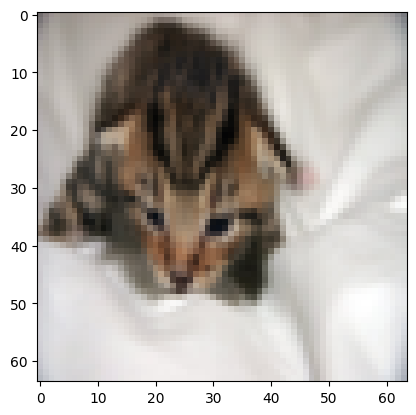

In [58]:
# 예시
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[0, index]) + ", 이 모델은 이 사진을 \"" + classes[
    int(logistic_regression_model['Y_prediction_test'][0, index])].decode("utf-8") + "\" 이라고 예측하고 있습니다.")

마지막으로 비용함수와 그래디언트를 시각화해봅시다.

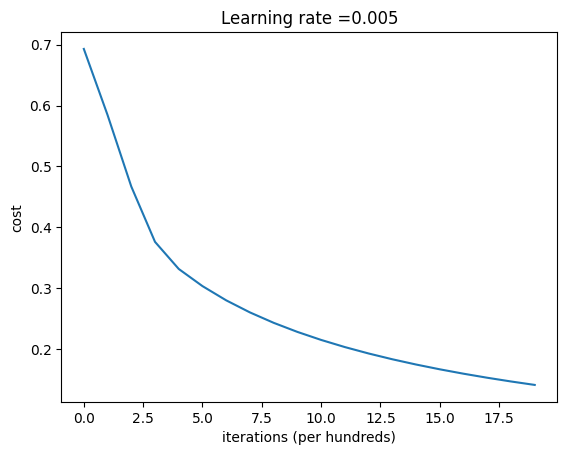

In [59]:
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

# 끝. 수고하셨습니다.